### Step-1:Business Problem Understanding

- The goal is to predict a person's medical expenses based on factors like age, BMI, smoking status, and other demographic information. This helps in estimating healthcare costs and making informed insurance or medical decisions.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Step-2 :Data Understanding

**Load Data & Understand every variable**

In [2]:
df = pd.read_csv(r'C:\Users\sahur\Downloads\insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


**Dataset Understanding**

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [7]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

**Exploratory Data Analysis**

In [9]:
continuous_features = ['age','bmi','expenses']
discrete_categorical = ['sex','smoker','region']
discrete_count = ['children']

In [10]:
df[continuous_features].describe()

,age,bmi,expenses
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,13270.422414
std,14.049960,6.098382,12110.011240
min,18.000000,16.000000,1121.870000
25%,27.000000,26.300000,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.700000,16639.915000
max,64.000000,53.100000,63770.430000


In [11]:
df[discrete_categorical].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [12]:
df[continuous_features].corr()

,age,bmi,expenses
age,1.000000,0.109341,0.299008
bmi,0.109341,1.000000,0.198576
expenses,0.299008,0.198576,1.000000


### Step-3:Data Preprocessing

**Data Cleaning**


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [14]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.shape

(1337, 7)

In [17]:
df.drop('region',axis = 1,inplace = True)

**Encoding**

In [18]:
# encoding sex column
df['sex'].replace({'female':0,'male':1},inplace = True)

# encoding 'smoker' column
df['smoker'].replace({'no':0,'yes':1},inplace = True)

C:\Users\sahur\AppData\Local\Temp\ipykernel_960\2577070180.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace({'female':0,'male':1},inplace = True)
C:\Users\sahur\AppData\Local\Temp\ipykernel_960\2577070180.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'].replace({'fe

**x&y**

In [19]:
x = df.drop('expenses',axis = 1)
y = df['expenses']

**Train Test Split**

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state = 13)

In [64]:
Train =[]
cv = []

for i in range(0,100):
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state =i)

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train,y_train)

    ypred_train= model.predict(x_train)

    from sklearn.metrics import r2_score
    Train.append(r2_score(y_train,ypred_train))

    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,x_train,y_train,cv=5).mean())

em = pd.DataFrame({'Train':Train,'cv':cv})

gm = em[(abs(em['Train'] - em['cv'])<= 0.05)]
rs = gm[gm['cv'] == gm['cv'].max()].index.tolist()[0]
print('best random state number :',rs)

best random state number : 55


### Step - 4,5:Modelling & Evaluation

**Applying Hyperparameter tunning for Lasso Regression**

In [60]:
from sklearn.model_selection import GridSearchCV

# model
from sklearn.linear_model import Lasso
estimator = Lasso()

# parameter & value
param_grid = {'alpha':list(range(1,100))}

# Identifying the best value of the parameter within given values for the given data 
model_hp = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'r2')

model_hp.fit(x_train,y_train)

model_hp.best_params_

{'alpha': 41}

**Build Lasso Model using best hyperparameters**

In [29]:
# Modelling
from sklearn.linear_model import Lasso
lasso_best =Lasso(alpha=60)
lasso_best.fit(x_train,y_train)

print('Intercept:',lasso_best.intercept_)
print('coefficient:',lasso_best.coef_)

Intercept: -12032.44006037373
coefficient: [  257.52540506    -0.           327.40951602   395.18579706
 23784.24323979]



- 📈 Linear Regression Equation
- In linear regression, the prediction equation looks like:

- 𝑦^=intercept +(𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡 1 × 𝑓𝑒𝑎𝑡𝑢𝑟𝑒 1)+(𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡2×𝑓𝑒𝑎𝑡𝑢𝑟𝑒2)+…

- In your case:

- expenses = − 13176.97 + 257.41 ⋅ age − 497.04 ⋅ sex + 364.55 ⋅ bmi + 569.18 ⋅ children + 23522.95⋅smoker


- 🧾 Interpreting the Coefficients

- 🔸 Intercept: -13176.97

 - This is the base value of expenses when all features are 0.

- It usually doesn't have much real-world meaning on its own (since features like age or BMI aren't actually 0), but it's needed for the math.

- 🔸 Coefficients:

- Feature	Coefficient	Interpretation

- age	+257.41	For every additional year of age, medical expenses increase by ~$257, assuming all other features stay constant.

- sex	-497.04	This is tricky — it's likely that sex was encoded: male=1, female=0. So, if someone is male, expenses go down by ~$497 compared to a female (all else equal).

- bmi	+364.55	For every 1-unit increase in BMI, expenses increase by ~$364. Higher BMI usually means higher health risk.

- children	+569.18	Each additional child adds ~$569 to medical expenses. Makes sense since more dependents = more healthcare costs.

- smoker	+23522.95	Huge impact! Smokers cost ~$23,523 more than non-smokers on average. Smoking is the strongest predictor here. 🔥🚬
- 🧠 Which Features Impact Expenses Most?
Looking at the magnitude of coefficients:

- ✅ Smoker has the largest impact by far.

- 🟡 BMI, Age, and Children have moderate positive effects.

- 🔻 Sex has a small negative effect — possibly not very significant.

- You could also check feature importance visually using a bar chart:

- import pandas as pd
- import matplotlib.pyplot as plt

- coeffs = pd.Series([257.41, -497.04, 364.55, 569.18, 23522.95],
                   index=['age', 'sex', 'bmi', 'children', 'smoker'])

- coeffs.sort_values().plot(kind='barh', title="Feature Impact on Medical Expenses")
- plt.xlabel("Coefficient Value")
- plt.show()
- ✅ Summary
- Coefficients show how much each feature influences the prediction.

- Bigger coefficients = stronger impact.

- The sign (positive or negative) tells you the direction of influence.

- In your model:

- 🔥 Smoking is the biggest factor in raising expenses.

- 🧓 Age, BMI, and children also increase costs.

- ⚥ Sex has a minor effect.



In [23]:
x_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')

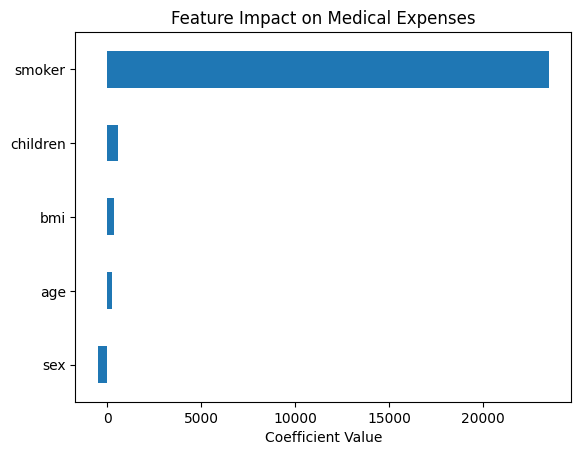

In [24]:
# by  chatgpt

import pandas as pd
import matplotlib.pyplot as plt

coeffs = pd.Series([257.41, -497.04, 364.55, 569.18, 23522.95],
                   index=['age', 'sex', 'bmi', 'children', 'smoker'])

coeffs.sort_values().plot(kind='barh', title="Feature Impact on Medical Expenses")
plt.xlabel("Coefficient Value")
plt.show()


In [32]:
# Modelling
from sklearn.linear_model import Lasso
lasso_best =Lasso(alpha=60)
lasso_best.fit(x_train,y_train)

print('Intercept:',lasso_best.intercept_)
print('coefficient:',lasso_best.coef_)

# prediction & Evaluation on trian data
ypred_train = lasso_best.predict(x_train)

from sklearn.metrics import r2_score
print('Trian R2:',r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score 
print('Cross validation score:',cross_val_score(lasso_best,x_train,y_train,cv = 5).mean())

ypred_test = lasso_best.predict(x_test)
print('Test R2:',r2_score(y_test,ypred_test))

Intercept: -12032.44006037373
coefficient: [  257.52540506    -0.           327.40951602   395.18579706
 23784.24323979]
Trian R2: 0.7478906528773264
Cross validation score: 0.7406404232913735
Test R2: 0.7545516589923734


### Final Model

In [1]:
x = x.drop('sex',axis=1)
y=df['expenses']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 9)

# Modelling
from sklearn.linear_model import Lasso
lasso_best = Lasso(alpha=60)
lasso_best.fit(x_train,y_train)

print('Intercept:',lasso_best.intercept_)
print('coefficient:',lasso_best.coef_)

# prediction & Evaluation on train data 
ypred_train = lasso_best.predict(x_train)

print('Trian R2:',r2_score(y_train,ypred_train))
print('Cross Validation Score:',cross_val_score(lasso_best,x_train,y_train,cv = 5).mean())

# prediction & Evaluation on train data 
ypred_test = lasso_best.predict(x_test)
print('Test R2:',r2_score(y_test,ypred_test))

NameError: name 'x' is not defined

### Prediction on New Data 

**Data**

In [52]:
input_data = {'age':35,
             'sex':'Male',
              'bmi':31.4,
              'children':5,
              'smoker':'yes',
              'region':'southeast'
             }

In [53]:
df_test = pd.DataFrame(input_data,index = [0])
df_test

,age,sex,bmi,children,smoker,region
0,35,Male,31.4,5,yes,southeast


**preprocessing the data**

In [54]:
df_test.drop(['region','sex'],axis = 1,inplace = True)

df_test['smoker'].replace({'no':0,'yes':1},inplace = True)

C:\Users\sahur\AppData\Local\Temp\ipykernel_960\2832146498.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['smoker'].replace({'no':0,'yes':1},inplace = True)
C:\Users\sahur\AppData\Local\Temp\ipykernel_960\2832146498.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['smoker'].r

**predict**

In [55]:
lasso_best.predict(df_test)

array([32650.80111484])

In [56]:
-12045.187463841941 + (264.37194096* 35) + (317.04095573 * 31.4) + (373.19607238 * 5) + (23621.90427308 * 1)

32650.801114660055